In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,NaN,NaN,NaN,1.84400,1.098700,NaN,0.81081,NaN,1.18790,0.95112,NaN,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	156
float64		column 2	237
float64		column 3	156
float64		column 4	159
float64		column 5	159
float64		column 6	159
float64		column 7	104
float64		column 8	104
float64		column 9	130
float64		column 10	159
float64		column 11	130
float64		column 12	237


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,644.000000,563.000000,644.000000,641.000000,641.000000,641.000000,696.000000,696.000000,670.000000,641.000000,670.000000,563.000000
mean,1.494144,1.263923,2.004334,1.933940,1.999267,2.011709,1.958324,2.037419,1.977179,1.996204,1.957011,1.923273
std,2.734994,3.596823,1.158960,1.144851,1.165700,1.150275,1.163711,1.139759,1.143472,1.153855,1.193929,1.104080
min,-4.692600,-6.952900,0.023586,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.002088
25%,-0.390055,-0.598400,1.030775,0.977730,0.982900,0.985700,0.944333,1.007025,1.055350,1.035000,0.878085,0.968225
50%,0.888675,0.514590,2.011550,1.905100,2.056600,2.053300,1.972050,2.037900,1.937850,2.054100,1.913400,1.878200
75%,3.949225,4.474900,2.982725,2.914000,2.960000,3.059100,2.991025,3.002325,2.983500,2.960300,3.072475,2.804550
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.997800,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

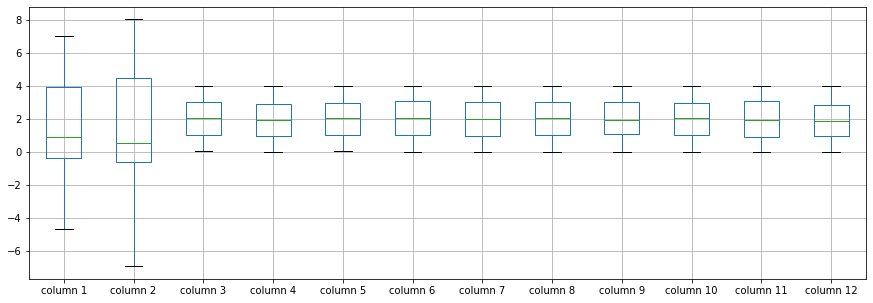

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1     1.494118
column 2     1.291077
column 3     1.974092
column 4     1.928878
column 5     1.996903
column 6     2.000199
column 7     1.983432
column 8     1.991657
column 9     1.974262
column 10    1.998405
column 11    1.961146
column 12    1.947068
dtype: float64

In [6]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.426490,-0.009347,-0.026890,0.002086,0.047243,-0.011770,0.055501,0.008564,0.034558,0.019680,-0.007296
column 2,-0.426490,1.000000,-0.010105,0.006346,0.045178,-0.019265,0.045416,-0.014485,0.026239,-0.096565,-0.078423,0.029382
column 3,-0.009347,-0.010105,1.000000,-0.001335,0.055317,0.010616,-0.003392,-0.004205,-0.005542,-0.023084,-0.035130,0.020941
column 4,-0.026890,0.006346,-0.001335,1.000000,-0.040086,0.000436,0.025529,0.042832,0.016563,0.038624,0.050481,-0.028644
column 5,0.002086,0.045178,0.055317,-0.040086,1.000000,0.024766,0.015686,-0.028343,-0.009796,-0.003971,-0.019529,0.008437
column 6,0.047243,-0.019265,0.010616,0.000436,0.024766,1.000000,-0.032734,0.059590,0.052430,0.012772,-0.019755,-0.008940
column 7,-0.011770,0.045416,-0.003392,0.025529,0.015686,-0.032734,1.000000,-0.065354,-0.007020,-0.023981,-0.037667,0.004710
column 8,0.055501,-0.014485,-0.004205,0.042832,-0.028343,0.059590,-0.065354,1.000000,-0.087576,-0.072905,0.002283,-0.054975
column 9,0.008564,0.026239,-0.005542,0.016563,-0.009796,0.052430,-0.007020,-0.087576,1.000000,0.038866,-0.013672,-0.023922
column 10,0.034558,-0.096565,-0.023084,0.038624,-0.003971,0.012772,-0.023981,-0.072905,0.038866,1.000000,-0.042083,0.068798


In [7]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [8]:
imputer = md.Midas(layer_structure = [12,12+40,12+40+40,12+40+40+40,12+40+40+40+40,12+40+40+40,12+40+40,12+40,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 23.55489803314209
Epoch: 1 , loss: 23.395043411254882
Epoch: 2 , loss: 23.12243106842041
Epoch: 3 , loss: 21.94620630264282
Epoch: 4 , loss: 19.000607166290283
Epoch: 5 , loss: 18.228573665618896
Epoch: 6 , loss: 17.889719581604005
Epoch: 7 , loss: 17.415650939941408
Epoch: 8 , loss: 17.238975620269777
Epoch: 9 , loss: 16.676738986968996
Epoch: 10 , loss: 16.6801815032959
Epoch: 11 , loss: 16.61285791397095
Epoch: 12 , loss: 16.444548416137696
Epoch: 13 , loss: 16.428126411437987
Epoch: 14 , loss: 16.17269365310669
Epoch: 15 , loss: 15.927661457061767
Epoch: 16 , loss: 16.183925609588623
Epoch: 17 , loss: 16.068246307373048
Epoch: 18 , loss: 15.927978954315186
Epoch: 19 , loss: 15.869710140228271
Epoch: 20 , loss: 15.86881851196289
Epoch: 21 , loss: 15.700634956359863
Epoch: 22 , loss: 15.881383609771728
Epoch: 23 , loss: 15.937819957733154
Epoch: 24 , loss: 15.833288879394532
Epoch: 25 , loss: 15.7625

In [9]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [10]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [11]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [12]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000
796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000
797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000
798,-2.993086,5.512564,-0.876361,0.000000,0.000000,-2.753489,0.0,-3.019548,0.0,0.000000,-1.20998,0.000000


Calculating NRMSE Value

In [13]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [14]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [15]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(86.10395248309366, 248.22200824735242)

In [16]:
NRMS=numerator/denominator
NRMS


0.3468828291699717

In [17]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [18]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.533700,0.469590,0.679080,3.43440,2.792400,2.77630,1.699100,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.921600,0.424720,1.178500,1.68020,1.388800,3.21670,2.923600,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.065000,1.567600,1.482400,0.92160,2.642400,1.51870,2.531800,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.956300,2.787000,2.595700,2.89330,1.537500,0.99942,3.659300,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.631200,3.554100,2.271100,0.37425,2.178600,1.31400,1.063200,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.556120,0.070769,2.074700,0.80304,3.222900,3.49330,1.325500,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.346100,1.377300,2.288700,0.39613,2.396100,2.46350,1.667500,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.264600,3.341200,1.537000,1.22560,0.740270,2.49540,1.343300,1.622500,1.585300
798,0.448314,0.296264,0.700639,1.844000,1.098700,0.670811,0.81081,0.707452,1.18790,0.951120,0.674520,1.143700


In [19]:
imputations[-1].to_excel("4-gauss_AG_20(imp).xlsx", index=False, header=False)